# Lesson-10 TensorFlow practise

basic data opearation

sess.run()的第一个参数是一般是[optimizer, cost]，这样返回值也是optimizer, cost的结果，相当于有几个参数就返回几个

In [1]:
import tensorflow as tf

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
#constant
a = tf.constant(2)
b = tf.constant(3)

In [3]:
# lunch the default graph
with tf.Session() as sess:
    print('a = {}, b = {}'.format(sess.run(a), sess.run(b)))
    print('Addation with constant {}'.format(sess.run(a + b)))

a = 2, b = 3
Addation with constant 5


In [4]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
#类似初始化一个变量，指定类型，但不赋值，而是通过feed_dict传入值
#可以把它看成一个神经节点对象，节点的数值里保存了其值，在训练过程中其值会更新，但初始值一定要通过feedfeed_dict传入
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [5]:
# define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)
with tf.Session() as sess:
    print('Addation with variables : {}'.format(sess.run(add, feed_dict={a:5, b:3})))

Addation with variables : 8


# Eager API（实时执行，不通过tf.Session()）

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
#set Eager API
print('set eager mode...')
tf.enable_eager_execution()
#assert tf.executing_eagerly()
tfe = tf.contrib.eager()

set eager mode...
Instructions for updating:
Use the retry module or similar alternatives.


TypeError: 'module' object is not callable

In [3]:
#define constant tensors
a = tf.constant(2)
b = tf.constant(3)
c = a +b
print(c)

tf.Tensor(5, shape=(), dtype=int32)


In [4]:
#full compatibility with numpy
print('mixing operation with tensors and numpy arrays')
#define a constant tensor
a = tf.constant([[2., 1.],
                [3., 4.]], dtype=tf.float32)
print("Tensor:\n a = %s" % a)
b = np.array([[2., 5.],
             [3., 1.]], dtype=np.float32)
print("NumpyArray:\n b = %s" % b)

mixing operation with tensors and numpy arrays
Tensor:
 a = tf.Tensor(
[[2. 1.]
 [3. 4.]], shape=(2, 2), dtype=float32)
NumpyArray:
 b = [[2. 5.]
 [3. 1.]]


In [5]:
#run the operation without session.run()
print("Running operations, without tf.Session")
c = a + b
print("a + b = %s" % c)

d = tf.matmul(a, b)
print("a * b = %s" % d)

Running operations, without tf.Session
a + b = tf.Tensor(
[[4. 6.]
 [6. 5.]], shape=(2, 2), dtype=float32)
a * b = tf.Tensor(
[[ 7. 11.]
 [18. 19.]], shape=(2, 2), dtype=float32)


# Basic Model

linear regrassion

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
%matplotlib inline

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
#parameters
learning_rate = 0.01
training_epoch = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [9]:
# input graph
X = tf.placeholder('float')
Y = tf.placeholder('float')
#set model weights
W = tf.Variable(rng.randn(), name='weights')
b= tf.Variable(rng.randn(), name='bias')

In [10]:
#construct a linear model wx + b
pred = tf.add(tf.multiply(W, X), b)
#mean squared error
cost = tf.reduce_sum(tf.pow(pred - y, 2)) / (2 * n_samples)

In [11]:
#gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#initialize the variable
init = tf.global_variables_initializer()

epoch: 0050 cost= 0.002171067 W= 0.026237627 b= 1.5127242
epoch: 0050 cost= 0.002170006 W= 0.026423542 b= 1.5127664
epoch: 0050 cost= 0.002170393 W= 0.026559114 b= 1.512791
epoch: 0050 cost= 0.002170662 W= 0.026594628 b= 1.5127963
epoch: 0050 cost= 0.002170766 W= 0.026606461 b= 1.512798
epoch: 0050 cost= 0.002172894 W= 0.026793547 b= 1.5128429
epoch: 0050 cost= 0.002169106 W= 0.026362943 b= 1.5127989
epoch: 0050 cost= 0.002169075 W= 0.026451038 b= 1.5128132
epoch: 0050 cost= 0.002169017 W= 0.026390424 b= 1.5128052
epoch: 0050 cost= 0.002168390 W= 0.026556144 b= 1.5128818
epoch: 0050 cost= 0.002168392 W= 0.026556598 b= 1.5128819
epoch: 0050 cost= 0.002172136 W= 0.0259253 b= 1.5128233
epoch: 0050 cost= 0.002169181 W= 0.0260798 b= 1.5128524
epoch: 0050 cost= 0.002170821 W= 0.025979072 b= 1.5128398
epoch: 0050 cost= 0.002168575 W= 0.02611302 b= 1.5128635
epoch: 0050 cost= 0.002174207 W= 0.025813485 b= 1.5128312
epoch: 0050 cost= 0.002169013 W= 0.02600887 b= 1.5128943
epoch: 0100 cost= 0.00

epoch: 0500 cost= 0.000720167 W= 0.015111383 b= 1.5921397
epoch: 0500 cost= 0.000719814 W= 0.015218459 b= 1.592164
epoch: 0500 cost= 0.000719943 W= 0.015296541 b= 1.5921782
epoch: 0500 cost= 0.000720031 W= 0.015316995 b= 1.5921813
epoch: 0500 cost= 0.000720066 W= 0.01532381 b= 1.5921823
epoch: 0500 cost= 0.000720772 W= 0.015431561 b= 1.5922081
epoch: 0500 cost= 0.000719517 W= 0.015183558 b= 1.5921828
epoch: 0500 cost= 0.000719506 W= 0.015234295 b= 1.592191
epoch: 0500 cost= 0.000719488 W= 0.015199385 b= 1.5921863
epoch: 0500 cost= 0.000719281 W= 0.01529483 b= 1.5922303
epoch: 0500 cost= 0.000719282 W= 0.015295094 b= 1.5922303
epoch: 0500 cost= 0.000720525 W= 0.014931504 b= 1.5921966
epoch: 0500 cost= 0.000719546 W= 0.015020489 b= 1.5922133
epoch: 0500 cost= 0.000720090 W= 0.014962478 b= 1.592206
epoch: 0500 cost= 0.000719345 W= 0.015039626 b= 1.5922196
epoch: 0500 cost= 0.000721214 W= 0.014867112 b= 1.592201
epoch: 0500 cost= 0.000719490 W= 0.014979644 b= 1.5922374
epoch: 0550 cost= 0.

epoch: 0950 cost= 0.000238918 W= 0.008703915 b= 1.6378745
epoch: 0950 cost= 0.000238801 W= 0.0087655885 b= 1.6378886
epoch: 0950 cost= 0.000238844 W= 0.008810561 b= 1.6378968
epoch: 0950 cost= 0.000238873 W= 0.0088223405 b= 1.6378986
epoch: 0950 cost= 0.000238884 W= 0.008826264 b= 1.6378992
epoch: 0950 cost= 0.000239119 W= 0.008888326 b= 1.6379141
epoch: 0950 cost= 0.000238703 W= 0.008745478 b= 1.6378994
epoch: 0950 cost= 0.000238699 W= 0.008774701 b= 1.6379042
epoch: 0950 cost= 0.000238692 W= 0.008754591 b= 1.6379015
epoch: 0950 cost= 0.000238623 W= 0.0088095665 b= 1.6379269
epoch: 0950 cost= 0.000238624 W= 0.008809716 b= 1.6379269
epoch: 0950 cost= 0.000239035 W= 0.008600291 b= 1.6379075
epoch: 0950 cost= 0.000238710 W= 0.008651543 b= 1.6379172
epoch: 0950 cost= 0.000238890 W= 0.008618128 b= 1.637913
epoch: 0950 cost= 0.000238643 W= 0.008662562 b= 1.6379209
epoch: 0950 cost= 0.000239263 W= 0.008563194 b= 1.6379101
epoch: 0950 cost= 0.000238692 W= 0.00862801 b= 1.637931
epoch: 1000 co

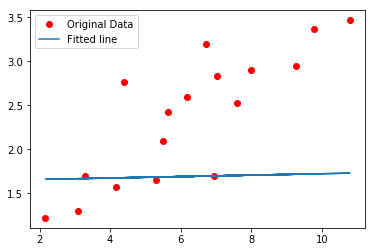

In [13]:
with tf.Session() as sess:
    sess.run(init)
    #fit all training data
    for epoch in range(training_epoch):
        for x, y in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
            #display each epoch step
            if (epoch +1) % display_step ==0:
                c= sess.run(cost, feed_dict={X: train_X, Y: train_Y})
                print('epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(c),
                     'W=', sess.run(W), 'b=', sess.run(b))
    print('optimization finished!')
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print('training_cost=', training_cost, 'W=', sess.run(W), 'b=', sess.run(b), '\n')
    
    # graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
                

# Logistic Regreesion

MNIST DATA

The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
data_path = '/home/student/project/project-01/nlp_bots/hw-xujing'
mnist = input_data.read_data_sets(data_path, one_hot=True)


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/t10k-images-idx3-ubyte.gz
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784) (55000, 10)


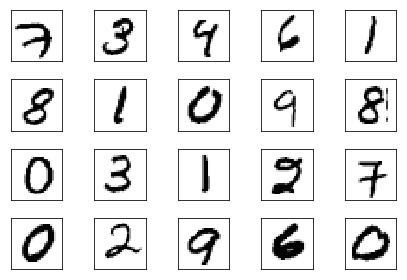

In [15]:
#display data images
#load data
train_X = mnist.train.images  # training data
valid_X = mnist.validation.images # validaton data
test_X = mnist.test.images # test data
#load labels
train_Y = mnist.train.labels # train labels
valid_Y = mnist.validation.labels # validation labels
test_Y = mnist.test.labels # test labels

print(train_X.shape, train_Y.shape)

fig, ax = plt.subplots(nrows=4, ncols=5, sharex='all', sharey='all') 
ax = ax.flatten()
for i in range(20):
    img = train_X[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [16]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
#parameters
learning_rate = 0.01
training_epoch = 25
batch_size = 100
display_step = 1

#tf graph input
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
# model variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

#construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # softmax

#minimize error with cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
#gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#initialize the variables
init = tf.global_variables_initializer()

In [20]:
# training
with tf.Session() as sess:
    sess.run(init)
    #training cycle
    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        #loop all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            #fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict = {x: batch_xs, y:batch_ys})
            #sess.run()
            #compute average loss
            avg_cost += c / total_batch
        #display
        if (epoch+1) % display_step ==0:
            print('epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
    print('Optimization Done!')
    
    #test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # compute accuracy for 3000 samples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', accuracy.eval({x :mnist.test.images[:3000], y: mnist.test.labels[:3000]}))
    

epoch: 0001 cost= 1.183237542
epoch: 0002 cost= 0.665535373
epoch: 0003 cost= 0.552689176
epoch: 0004 cost= 0.498705607
epoch: 0005 cost= 0.465613799
epoch: 0006 cost= 0.442399512
epoch: 0007 cost= 0.425839814
epoch: 0008 cost= 0.412213691
epoch: 0009 cost= 0.401388979
epoch: 0010 cost= 0.392320770
epoch: 0011 cost= 0.384821161
epoch: 0012 cost= 0.378168864
epoch: 0013 cost= 0.372331645
epoch: 0014 cost= 0.367483944
epoch: 0015 cost= 0.362528441
epoch: 0016 cost= 0.358694902
epoch: 0017 cost= 0.354724888
epoch: 0018 cost= 0.351422819
epoch: 0019 cost= 0.348571076
epoch: 0020 cost= 0.345251840
epoch: 0021 cost= 0.342782933
epoch: 0022 cost= 0.340284714
epoch: 0023 cost= 0.337898877
epoch: 0024 cost= 0.335535799
epoch: 0025 cost= 0.333945199
Optimization Done!
Accuracy: 0.8893333


# Nearest Neighbors

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
data_path = '/home/student/project/project-01/nlp_bots/hw-xujing'
mnist = input_data.read_data_sets(data_path, one_hot=True)
import numpy as np

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/t10k-images-idx3-ubyte.gz
Extracting /home/student/project/project-01/nlp_bots/hw-xujing/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
X_train, Y_train = mnist.train.next_batch(5000)
X_test, Y_test = mnist.test.next_batch(200)

# input tf graph
x_train = tf.placeholder('float', [None, 784])
x_test = tf.placeholder('float', [784])

#tf.negative()
#nearest neighbor calculation using L1 distance
#distance tf.reduce_sum(tf.abs(tf.add(x_train, tf.negative(x_test))), reduction_indices=1)
#L2 distance
distance = tf.reduce_sum(tf.square(tf.add(x_train, tf.negative(x_test))), reduction_indices= 1)
#prediction get min distance index(nearest neighbor)
pred = tf.argmin(distance, 0)

accuracy = 0

In [6]:
#training
with tf.Session() as sess:
    sess.run(init)
    
    #loop over test data
    for i in range(len(X_test)):
        #get nearest neighbor
        nn_index = sess.run(pred, feed_dict={x_train:X_train, x_test : X_test[i, :]})
        #get nearest class label and compare it with its true label
        print('test', i, 'prediction', np.argmax(Y_train[nn_index]),
                                                'true class', np.argmax(Y_test[i]))
        #calculate accuracy
        if np.argmax(Y_train[nn_index]) == np.argmax(Y_test[i]):
            accuracy += 1. / len(X_test)
    print('Done!')
    print('Accuracy', accuracy)

test 0 prediction 1 true class 1
test 1 prediction 0 true class 0
test 2 prediction 1 true class 4
test 3 prediction 0 true class 0
test 4 prediction 6 true class 6
test 5 prediction 1 true class 1
test 6 prediction 7 true class 7
test 7 prediction 3 true class 3
test 8 prediction 2 true class 2
test 9 prediction 9 true class 4
test 10 prediction 2 true class 2
test 11 prediction 1 true class 1
test 12 prediction 4 true class 4
test 13 prediction 9 true class 9
test 14 prediction 4 true class 4
test 15 prediction 2 true class 2
test 16 prediction 9 true class 9
test 17 prediction 4 true class 4
test 18 prediction 2 true class 2
test 19 prediction 2 true class 2
test 20 prediction 8 true class 8
test 21 prediction 6 true class 6
test 22 prediction 7 true class 7
test 23 prediction 2 true class 2
test 24 prediction 2 true class 2
test 25 prediction 2 true class 2
test 26 prediction 0 true class 0
test 27 prediction 3 true class 3
test 28 prediction 6 true class 6
test 29 prediction 0 tru

# Neural Network

In [8]:
train_X = mnist.train.images
valid_X = mnist.validation.images
test_X = mnist.test.images
train_Y = mnist.train.labels
valid_Y = mnist.validation.labels
test_Y = mnist.test.labels

batch_size = 128
num_hidden_nodes = 1024
image_size = 28
num_labels = 10
graph = tf.Graph()

with graph.as_default():
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_X)
    tf_test_dataset = tf.constant(test_X)
    
    #variables
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_hidden_nodes]))
    biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    weights2 = tf.Variable(tf.truncated_normal([num_hidden_nodes, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))
    
    #training computation
    lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    logits = tf.matmul(lay1_train, weights2) + biases2
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=tf_train_labels, logits=logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    #predictions
    train_prediction = tf.nn.softmax(logits)
    
    lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) +biases1)
    valid_prediction = tf.nn.softmax(tf.matmul(lay1_valid, weights2) + biases2)
    
    lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_prediction = tf.nn.softmax(tf.matmul(lay1_test, weights2) + biases2)

In [9]:
print(train_X.shape)
print(train_Y.shape)

(55000, 784)
(55000, 10)


In [11]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

num_steps = 500
##3001*128 总共的训练数据   ## 之前是801*10000
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        ##分母减去batch_size是防止当batch_size不能被训练数据量整除时，offset:(offset + batch_size)超出数组界限
        offset = (step * batch_size) % (train_Y.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_X[offset:(offset + batch_size), :]
        batch_labels = train_Y[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 50 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_Y))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_Y))

Initialized
Minibatch loss at step 0: 274.133240
Minibatch accuracy: 11.7%
Validation accuracy: 20.3%
Minibatch loss at step 50: 13.896990
Minibatch accuracy: 85.2%
Validation accuracy: 84.2%
Minibatch loss at step 100: 10.199195
Minibatch accuracy: 87.5%
Validation accuracy: 87.6%
Minibatch loss at step 150: 9.097733
Minibatch accuracy: 89.1%
Validation accuracy: 89.8%
Minibatch loss at step 200: 6.576060
Minibatch accuracy: 90.6%
Validation accuracy: 90.8%
Minibatch loss at step 250: 2.354981
Minibatch accuracy: 93.8%
Validation accuracy: 91.1%
Minibatch loss at step 300: 6.327595
Minibatch accuracy: 86.7%
Validation accuracy: 89.2%
Minibatch loss at step 350: 10.324965
Minibatch accuracy: 89.1%
Validation accuracy: 91.5%
Minibatch loss at step 400: 6.174293
Minibatch accuracy: 91.4%
Validation accuracy: 91.9%
Minibatch loss at step 450: 6.058807
Minibatch accuracy: 90.6%
Validation accuracy: 90.9%
Test accuracy: 92.0%
